There are 5572 rows and 2 columns
  Category                                            Message  Label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minnamin...      0
8     spam  WINNER!! As a valued network customer you have...      1
9     spam  Had your mobile 11 months or more? U R entitle...      1
Category    0
Message     1
Label       0
dtype: int64
There are 5571 rows and 3 columns
ham     4824
spam     747
Name: Category, dtype: int64


/Users/alexiasousa/Documents/COMP432/Project/SpamFilter/datapreprocessing.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['v1', 'v2']), 1, inplace=True)


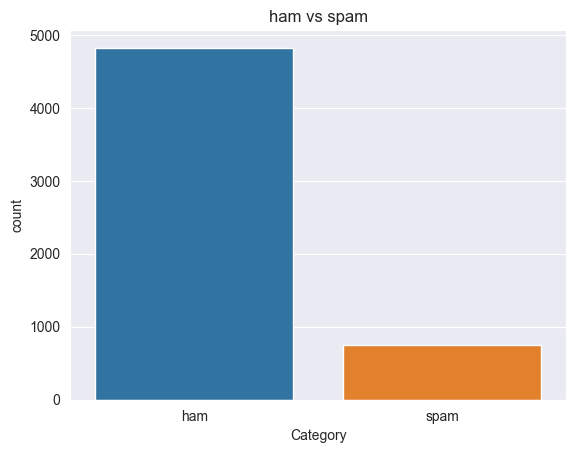

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
2  free entri wkli comp win fa cup final tkt st m...      1
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
X_train: (4456,)


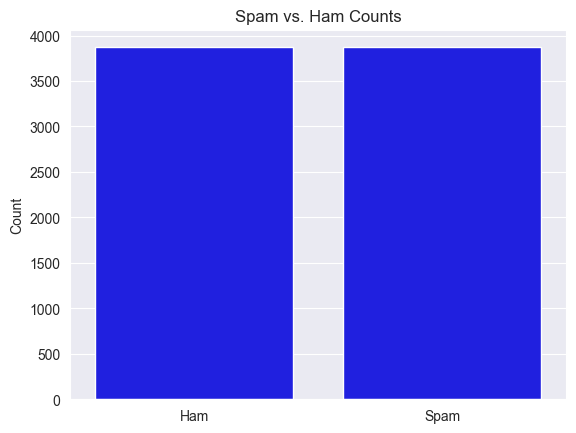

In [110]:
# Import preprocessed data

from datapreprocessing import get_cleaned_data
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()

In [111]:
# Train the model using Decision Tree Classifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from scipy.stats import randint

model = tree.DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "min_samples_leaf": randint(1, 9),
                "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(model, param_dist, cv=5)
tree_cv.fit(X_train, y_train)

# Test model

y_pred = tree_cv.predict(X_test)

In [112]:
# Evaluate accuracy of model

from sklearn.metrics import classification_report
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test, y_pred))

Accuracy:  86.90582959641256
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       953
           1       0.54      0.65      0.59       162

    accuracy                           0.87      1115
   macro avg       0.74      0.78      0.76      1115
weighted avg       0.88      0.87      0.87      1115



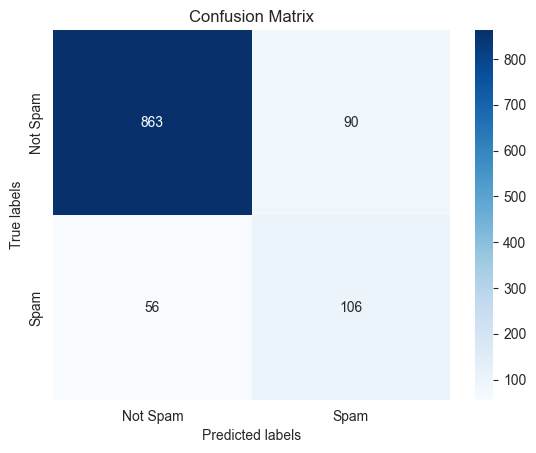

In [113]:
# Plot Confusion Matrix

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax,cmap='Blues',fmt='');

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted labels');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']);
ax.set_ylabel('True labels');
ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);